# Function Testing Notebook - Matrix Difference Plot

This notebook is meant to test external-facing functions to ensure they are working as expected.

A dedicated test_all_functions.py with unit testing might be better, but this is a good benchmark

In [1]:
import os
import sys
from pathlib import Path
import time
import tempfile
import logging

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mne
from dask_jobqueue import SLURMCluster
from dask.distributed import Client, LocalCluster

In [2]:
packageroot = Path('../../').resolve()
# packageroot = Path('/home/dongjp/source-code/PyEEG').resolve()
print(packageroot)
sys.path.append(str(packageroot))

from pythoneeg import core
from pythoneeg import visualization
from pythoneeg import constants

print(core.__all__)
# print(visualization.__all__)
# print(dir(constants))

C:\Users\User\source-code\PyEEG


c:\Users\User\source-code\PyEEG\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['DDFBinaryMetadata', 'LongRecordingOrganizer', 'convert_ddfcolbin_to_ddfrowbin', 'convert_ddfrowbin_to_si', 'convert_units_to_multiplier', 'convert_colpath_to_rowpath', 'filepath_to_index', 'is_day', 'set_temp_directory', 'get_temp_directory', 'parse_path_to_animalday', 'parse_path_to_genotype', 'parse_path_to_animal', 'parse_path_to_day', 'parse_chname_to_abbrev', 'nanaverage', 'LongRecordingAnalyzer', 'MountainSortAnalyzer', 'FragmentAnalyzer']


In [3]:
# core.set_temp_directory('/scr1/users/dongjp')
core.set_temp_directory(Path('../../tmp/').resolve())
core.get_temp_directory()

WindowsPath('C:/Users/User/source-code/PyEEG/tmp')

## Test WAR

In [4]:
wars = []
animal_ids = ['A10', 'F22']
for animal_id in animal_ids:
    # REVIEW consider making this process a single one-line function
    war = visualization.WindowAnalysisResult.load_pickle_and_json(Path(f'./test-wars/{animal_id}').resolve())
    war = war.filter_all()
    wars.append(war)

    # sars = []
    # for path in Path('./test-sars/').glob(f'*{animal_id}*'):
    #     sars.append(visualization.SpikeAnalysisResult.load_fif_and_json(path))
    # war.read_sars_spikes(sars, read_mode='mne')

ep = visualization.ExperimentPlotter(wars, exclude=['nspike'])


Channel names: 	['Intan Input (1)/PortC C-009', 'Intan Input (1)/PortC C-010', 'Intan Input (1)/PortC C-012', 'Intan Input (1)/PortC C-014', 'Intan Input (1)/PortC C-015', 'Intan Input (1)/PortC C-016', 'Intan Input (1)/PortC C-017', 'Intan Input (1)/PortC C-019', 'Intan Input (1)/PortC C-021', 'Intan Input (1)/PortC C-022']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']
Channel names: 	['Intan Input (1)/PortC C-009', 'Intan Input (1)/PortC C-010', 'Intan Input (1)/PortC C-012', 'Intan Input (1)/PortC C-014', 'Intan Input (1)/PortC C-015', 'Intan Input (1)/PortC C-016', 'Intan Input (1)/PortC C-017', 'Intan Input (1)/PortC C-019', 'Intan Input (1)/PortC C-021', 'Intan Input (1)/PortC C-022']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']
Channel names: 	['Intan Input (1)/PortD D-009', 'Intan Input (1)/PortD D-010', 'Intan Input (1)/PortD D-012', 'Intan Input (1)/PortD D-0

In [5]:
for feat in constants.LINEAR_FEATURE:
    if feat == 'nspike':
        logging.info("skipping nspike")
        continue
    logging.info(f'pulling {feat}')
    ep.pull_timeseries_dataframe(feat, ['genotype','animalday'])

df2 = ep.pull_timeseries_dataframe('rms', ['genotype','animal'], collapse_channels=True)

C:\Users\User\source-code\PyEEG\pythoneeg\visualization\plotting\experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
C:\Users\User\source-code\PyEEG\pythoneeg\visualization\plotting\experiment.py:141: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


In [6]:
# g = ep.plot_catplot('psdband', ['animal'], 
#                     collapse_channels=False, hue='channel', col='band',
#                     # stat_pairs='x',
#                     # stat_pairs=[[('A10 KO Dec-13-2023', 'theta'), ('F22 KO Dec-12-2023', 'delta')]],
#                     # stat_pairs=[[('F22', 'delta'), ('F22', 'theta')], [('F22', 'theta'), ('A10', 'theta')]], 
#                     # stat_pairs=[[('F22', 'delta'), ('F22', 'theta')], [('F22', 'theta'), ('A10', 'theta')]], 
#                     # stat_pairs=perms,
#                     # stat_test='Brunner-Munzel',
#                     # norm_test='log-D-Agostino',
#                     )

In [7]:
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG, stream=sys.stdout, force=True)
logger = logging.getLogger()

2025-04-09 17:54:40,121 - DEBUG - groups: [('A10 KO Dec-13-2023', 'KO'), ('F22 KO Dec-12-2023', 'KO')]
2025-04-09 17:54:40,124 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-04-09 17:54:40,124 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-04-09 17:54:40,131 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-04-09 17:54:40,131 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-04-09 17:54:40,141 - DEBUG - Groupby: ['animalday', 'genotype']
2025-04-09 17:54:40,142 - DEBUG - Baseline groupby: ['animalday', 'genotype']
2025-04-09 17:54:40,142 - DEBUG - Baseline key: ('A10 KO Dec-13-2023', 'KO')
2025-04-09 17:54:40,144 - DEBUG - Remaining groupby: []
2025-04-09 17:54:40,227 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x000001A937187B50>
2025-04-09 17:54:40,244 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x000001A9371E0D90>
2025-04-09 17:54:40,355 - DEBUG - groups: ['A10 KO Dec-13-2023', 'F22 KO Dec-12-2023']
2025-04-09 17:54:40,357 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-04-09

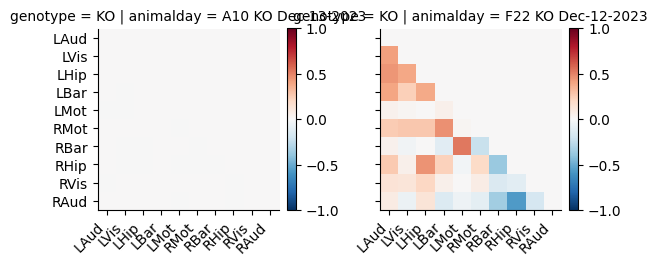

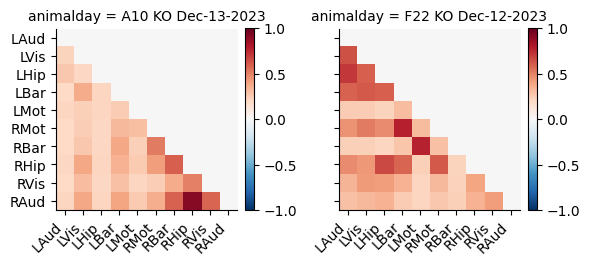

In [13]:
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG, stream=sys.stdout, force=True)
logger = logging.getLogger()
ep.plot_diffheatmap('cohere', ['animalday', 'genotype'], baseline_key=('A10 KO Dec-13-2023', 'KO'))
# ep.plot_diffheatmap('cohere', ['animalday', 'genotype', 'isday'], baseline_key=(True, 'KO'), baseline_groupby=['isday', 'genotype'])
# ep.plot_diffheatmap('cohere', 'animalday', baseline_key='A10 KO Dec-13-2023', remove_baseline=True)
ep.plot_heatmap('cohere', 'animalday')
